## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summative_df = mouse_metadata.merge(study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
summative_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
summative_df['Mouse ID'].value_counts().count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# This generates a boolean Series based upon whether the row contains a duplicate in the two given columns
repeats = summative_df.duplicated(['Mouse ID','Timepoint'],keep="first")

# Optional: Get all the data for the duplicate mouse ID.
# dup_df is the dataframe which contains all of the data from the duplicate mice
dup_df = summative_df[repeats]

# Gets the unique Mouse IDs from the duplicate dataframe and print them out
dup_mice = dup_df['Mouse ID'].unique()
print(dup_mice)

['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
 
# This loops through the duplicate dataframe and edits summative_df to remove all data from that mouse
# In this case there is only one mouse, but it would work if there were any number of mice with duplicates
for i in range(len(dup_mice)):
    summative_df = summative_df.loc[summative_df['Mouse ID'] != dup_mice[i],:]
    


In [5]:
# Checking the number of mice in the clean DataFrame.
# Display the number of mice that have duplicates and the number remaining after removal of these mice
print(len(dup_mice))
summative_df['Mouse ID'].value_counts().count()

1


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Take the mean of the first column and creating a dataframe
sum_stat_df = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().to_frame()

#Rename the first column
sum_stat_df = sum_stat_df.rename(columns = {'Tumor Volume (mm3)': 'Mean'})

# Populate the rest of the table
sum_stat_df['Median'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
sum_stat_df['Variance'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sum_stat_df['Standard Deviation'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sum_stat_df['Standard Error of the Mean'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

sum_stat_df


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# WOW this is a really valuable method to know.
second_stat_df = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
second_stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

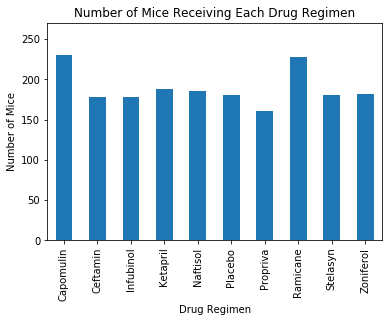

In [86]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# This row does a lot of work at once
# It groups the original dataframe by drug regimen by count, creates a dataframe, and bumps the index into a column
grouped_df = summative_df.groupby('Drug Regimen')['Mouse ID'].count().to_frame().reset_index()

# Then we plot a bar graph to visualize the number of mice in each regimen
grouped_df.plot(x='Drug Regimen', y = 'Mouse ID', kind = 'bar', legend = False)
plt.ylabel('Number of Mice')
plt.ylim([0,grouped_df['Mouse ID'].max() + 40])
plt.title('Number of Mice Receiving Each Drug Regimen')
plt.show()

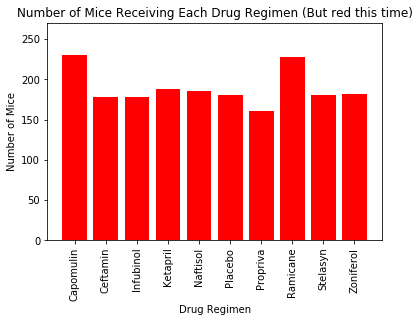

In [84]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(grouped_df['Drug Regimen'],grouped_df['Mouse ID'], color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.ylim([0,grouped_df['Mouse ID'].max() + 40])
plt.title('Number of Mice Receiving Each Drug Regimen (But red this time)')
plt.show()

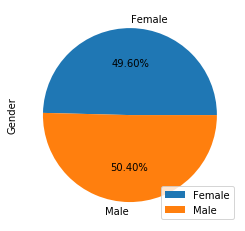

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Obtain a dataframe with one row for all unique mouse IDs
gender_df = summative_df.drop_duplicates('Mouse ID')

# Count up the number of each gender and create a dataframe
gender_df = gender_df.groupby('Sex')['Mouse ID'].count().to_frame()

# Rename the column to Gender
gender_df = gender_df.rename(columns = {'Mouse ID': 'Gender'})

# Pie chart automatically assumes 'Sum of column is the total to divide each value by'
# Autopct adds in the percentage labels
gender_df.plot(y= 'Gender',kind = 'pie', autopct='%1.2f%%')

# Move the legend for readability
plt.legend(loc = 'lower right')
plt.show()


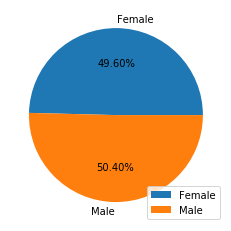

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pass the series in as our values, assign titles to each slice, and format the string
plt.pie(gender_df['Gender'], labels = ['Female','Male'], autopct='%1.2f%%')
plt.legend(loc = 'lower right')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Use a smaller dataframe which only contains the treatement regimens we're interested in
reduced_df = summative_df.loc[(summative_df['Drug Regimen'] == 'Capomulin') | (summative_df['Drug Regimen'] == 'Ramicane') | (summative_df['Drug Regimen'] == 'Infubinol') | (summative_df['Drug Regimen'] == 'Ceftamin'), :]

# Bump Mouse ID into the index column so it can be used as a 'level' in the next command
reduced_df = reduced_df.set_index('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
max_df = reduced_df['Timepoint'].max(level = 'Mouse ID').to_frame()

# Sort the dataframe if desired for visualization
max_df = max_df.sort_values('Timepoint', ascending = False)



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Merge on both columns so you are left with only the max timepoint rows
result_df = reduced_df.merge(max_df, on = ['Mouse ID','Timepoint'])
result_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3
y163,Infubinol,Female,17,27,45,67.685569,3
y769,Ceftamin,Female,6,27,45,68.594745,4


In [76]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Made this a dictionary so that each set of tumor values could be stored separately



# Create empty list to fill with tumor vol data (for plotting)
# Create a list of empty lists with one for each drug
tumor_vol = [[] for i in range(len(treatments))]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
inter_quartile_ranges = []
maxval = 0
minval = 100

# Create an empty list of lists to hold all of the outliers
outliers = [[] for i in range(len(treatments))]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
# For loop to populate our calculation lists and to evaluate any potential outliers    
for drug in treatments:
    outlier = False
    # Grab the section of result_df that contains the values for each drug
    temp_df = result_df.loc[result_df['Drug Regimen'] == drug,:]
    
    # Loop through the Tumor Volume column and place them into the list
    for i in temp_df['Tumor Volume (mm3)']:
        tumor_vol[treatments.index(drug)].append(i)
        
    # Evaluate the maximum and minimum values for y-limits
    if max(tumor_vol[treatments.index(drug)]) > maxval:
        maxval = max(tumor_vol[treatments.index(drug)])
    if min(tumor_vol[treatments.index(drug)]) < minval:
        minval = min(tumor_vol[treatments.index(drug)])
    
    # Calculate the interquartile range and store all ranges if needed later
    iqr = np.quantile(tumor_vol[treatments.index(drug)],0.75) - np.quantile(tumor_vol[treatments.index(drug)],0.25)
    inter_quartile_ranges.append(iqr)
    
    # Calculate the outlier bounds
    upper_bound = np.quantile(tumor_vol[treatments.index(drug)],0.75) + 1.5*iqr
    lower_bound = np.quantile(tumor_vol[treatments.index(drug)],0.25) - 1.5*iqr
    
    # Loop through the tumor volumes for each drug and determine if there are outliers
    for i in tumor_vol[treatments.index(drug)]:
        if i > upper_bound or i < lower_bound:
            outlier = True
            outliers[treatments.index(drug)].append(i)
            
    # Print out the outliers for the drug if there are any
    if outlier:
        print('The treatment values for the drug ' + drug + ' contains the following outlier(s):')
        print(outliers[treatments.index(drug)])
        
    
    # add subset 

    
    # Determine outliers using upper and lower bounds

The treatment values for the drug Infubinol contains the following outlier(s):
[36.321345799999996]


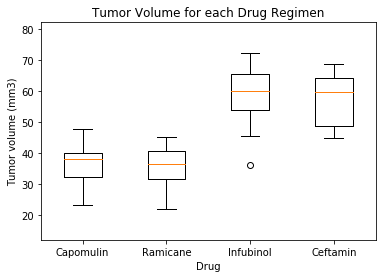

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = treatments)

plt.xlabel('Drug')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor Volume for each Drug Regimen')
plt.ylim([minval - 10,maxval + 10])
plt.show()
# You can see the single outlier we calculated above

## Line and Scatter Plots

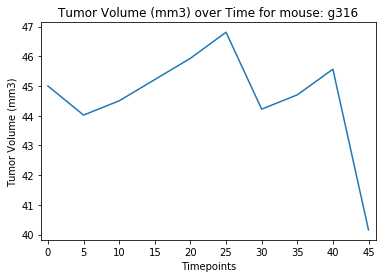

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Grab all the mice that were treated with Capomulin
capmice = summative_df.loc[summative_df['Drug Regimen'] == 'Capomulin',:].reset_index()

# Determine the number of unique mice contained
length = capmice['Mouse ID'].unique().size

# Pick one of the ids at random
mouse_id = capmice['Mouse ID'].unique()[random.randint(0,length)]

# Grab the data for this mouse id and then plot (with proper formatting)
mouse_df = capmice.loc[capmice['Mouse ID'] == mouse_id,:]
plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'])
plt.title('Tumor Volume (mm3) over Time for mouse: ' + mouse_id)
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(mouse_df['Timepoint'])
plt.xlim([-1,mouse_df['Timepoint'].max() + 1])
plt.show()

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
